In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

board_games = pd.read_csv("board_games.csv")
board_games = board_games.dropna()
board_games = board_games[board_games['users_rated'] > 0]
cols = list(board_games.columns)

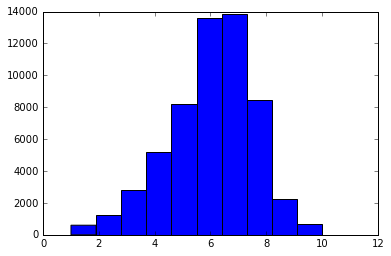

In [2]:
plt.hist(board_games['average_rating'])
plt.show()

# Average Rating Histogram

It appears as though the majority of ratings fall between 5-8 with 6 and 7 making up the preponderance of observations.

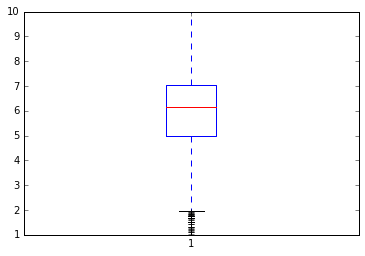

In [3]:
plt.boxplot(board_games['average_rating'])
plt.show()

In [4]:
print(board_games['average_rating'].mean())
print(board_games['average_rating'].std())
print(board_games['average_rating'].median())


6.01611284933
1.57882993483
6.15


# Mean and Standard Deviation

As we can see above, the median and mean are closely aligned, and with a standard deviation within 2 we see that most data points fall right around the mean range. The histogram above shows in more detail that the average ratings follow roughly a normal distribution.

# Choosing an Error Metric

Because the data is continuous, the mean squared error should be a valid error metric for our tests.

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5, n_init=10, random_state=1)
numeric_columns = board_games

In [6]:
numeric_columns = board_games.drop(['name','type','id'],axis=1)
km.fit(numeric_columns)
labels=km.labels_

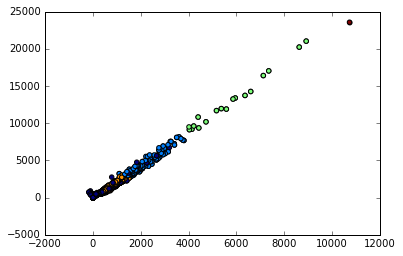

In [7]:
game_mean = numeric_columns.apply((lambda x: x.mean()), axis=1)
game_std = numeric_columns.apply((lambda x: x.std()), axis=1)

plt.scatter(game_mean, game_std, c=labels)

# Mean vs Standard Deviation Scatterplot

There seems to be a linear relationship between the means and standard deviations of the KMeans, and a severe clustering of values in the bottom left quadrant.

In [8]:
correlations = numeric_columns.corr()
print(correlations['average_rating'])

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64


# Column correlations
It's interesting to note that the greatest correlation to average_rating is the average_weight column. Beyond that, the bayes_average_rating (which would make sense, being that it also has to do with average ratings) and, oddly enough, the minimum age column are somewhat correlated to the average rating.

In [9]:
cols.remove('average_rating')
cols.remove('bayes_average_rating')
cols.remove('name')
cols.remove('type')
cols.remove('id')

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
average_rating = reg.fit(board_games[cols], board_games['average_rating'])
predictions = reg.predict(board_games[cols])



In [12]:
mean_squared_error(board_games['average_rating'], predictions)


2.0933969758339361

# Game clusters

The error rate is close to the standard deviation of all board game ratings. This indicates that our model may not have high predictive power. We'll need to dig more into which games were scored well, and which ones weren't.